# Project - CO2 Per Capita

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- Explore how Data Visualization can help present findings with a message
- We will explore the CO2 per capita dataset
- It will be your task to what kind of message you want the receiver to get
- NOTE: We still have limited skills, hence, we must limit our ambitions in our analysis

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.b: Read the data
- Use ```pd.read_csv()``` to read the file `files/WorldBank-ATM.CO2E.PC_DS2.csv`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- NOTE: Use ```index_col=0``` as argument to set the index column.
- Apply ```.head()``` on the data to see all is as expected

In [46]:
data = pd.read_csv('files/WorldBank-ATM.CO2E.PC_DS2.csv', index_col=0)

In [47]:
data.head()

,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1960,204.631696,0.906060,0.046057,0.090880,0.100835,1.258195,NaN,0.609268,0.119037,2.383343,...,NaN,0.181947,NaN,3.121158,0.135031,NaN,0.011038,5.727223,NaN,NaN
1961,208.837879,0.922474,0.053589,0.095283,0.082204,1.374186,NaN,0.662618,0.109136,2.458551,...,NaN,0.183099,NaN,3.068090,0.163542,NaN,0.013599,5.832621,NaN,NaN
1962,226.081890,0.930816,0.073721,0.096612,0.210533,1.439956,NaN,0.727117,0.163542,2.538447,...,NaN,0.217694,0.595002,3.114839,0.158377,NaN,0.012729,5.887168,NaN,NaN
1963,214.785217,0.940570,0.074161,0.112376,0.202739,1.181681,NaN,0.853116,0.175833,2.330685,...,NaN,0.196997,0.471849,3.221195,0.184037,NaN,0.014518,5.961337,NaN,NaN
1964,207.626699,0.996033,0.086174,0.133258,0.213562,1.111742,NaN,0.972381,0.132815,2.553442,...,NaN,0.209870,0.864427,3.324046,0.208106,NaN,0.017550,6.332343,0.946606,1.034904


### Step 1.c: Size of data
- The columns represent countries and rows years
- Apply ```.shape``` on the DataFrame to see if data is as expected

In [48]:
data.shape

(59, 266)

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Get the data types by ```.dtypes```
- We expect all data to numeric
- Try out ```.info()``` to get an overview.

In [49]:
data.dtypes

ABW    float64
AFE    float64
AFG    float64
AFW    float64
AGO    float64
        ...   
XKX    float64
YEM    float64
ZAF    float64
ZMB    float64
ZWE    float64
Length: 266, dtype: object

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1960 to 2018
Columns: 266 entries, ABW to ZWE
dtypes: float64(266)
memory usage: 123.1 KB


### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isnull().any()```
- This is expected - but we need to be aware of it

In [51]:
# data.isnull().any()
data.isnull().any().sum()

75

In [52]:
data.isnull().sum()

ABW    29
AFE     0
AFG     0
AFW     0
AGO     0
       ..
XKX    59
YEM     0
ZAF     0
ZMB     4
ZWE     4
Length: 266, dtype: int64

### Step 2.c: Visualize number of missing data points
- To get an idea of the maginitude of the problem you can visualize the number of missing rows for each country.
- ```.isnull()``` identifies missing values
- ```.isnull().sum()``` counts the number of missing values per country
- ```.isnull().sum().plot.hist()``` plots how many countries have missing values in ranges

<AxesSubplot:ylabel='Frequency'>

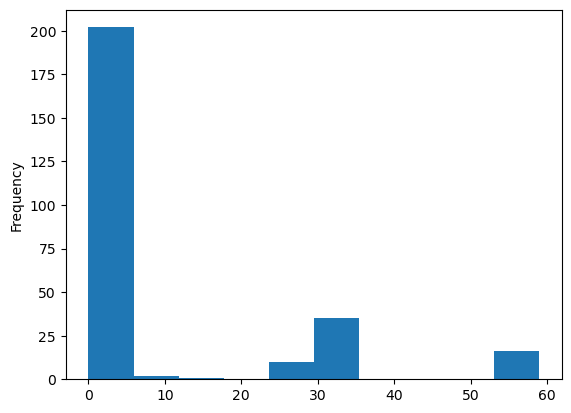

In [53]:
data.isnull().sum().plot.hist()

### Step 2.d: Clean data
- A simple way to clean data is to remove columns with missing data
- Use ```.dropna(axis='columns')``` to remove columns with missing data
- Check how may columns are left
    - HINT: apply ```len(...)``` on the DataFrame columns

In [54]:
clean_data = data.dropna(axis='columns')

In [62]:
len(clean_data.columns), len(data.columns)

(191, 266)

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Percentage change 20 years
- Calculate the change in CO2 per capita from 1998 to 2018
    - HINT: Formula is (value in 2018 - value in 1998) / value in 1998
    - This can be calculated on all rows simultaneously
        - ```(data_clean.loc[2018] - data_clean.loc[1998])/data_clean.loc[1998]``` Assuming the data is in ```data_clean```

In [56]:
(clean_data.loc[2018]- clean_data.loc[1998])/ clean_data.loc[1998]

AFE   -0.037269
AFG    2.762415
AFW    0.116810
AGO    0.198752
ALB    2.371394
         ...   
VNM    3.698443
WLD    0.185926
WSM    1.014300
YEM   -0.541857
ZAF    0.104416
Length: 191, dtype: float64

### Step 3.b: Describe the data 
- A great way to understand data is to apply ```.describe()```
- How does this help you to understand data?

In [57]:
((clean_data.loc[2018]- clean_data.loc[1998])/ clean_data.loc[1998]).describe()

count    191.000000
mean       0.494745
std        1.341795
min       -0.737721
25%       -0.101786
50%        0.198752
75%        0.643839
max       15.694284
dtype: float64

### Step 3.c: Visualization of data
- This helps you to understand data better
- We start with a histogram ```.plot.hist(bins=30)```
- Try with a Pie Chart on values below 0
    - HINT: Use ```(data_plot < 0).value_counts()``` (assuming data is in ```data_plot```)
    - Chart: ```.plot.pie(colors=['r', 'g'], labels=['>= 0', '< 0'], title='Title', ylabel='label', autopct='%1.1f%%')```
- Play around with other visualizations

In [58]:
new_data = (clean_data.loc[2018]- clean_data.loc[1998])/ clean_data.loc[1998]

<AxesSubplot:ylabel='Frequency'>

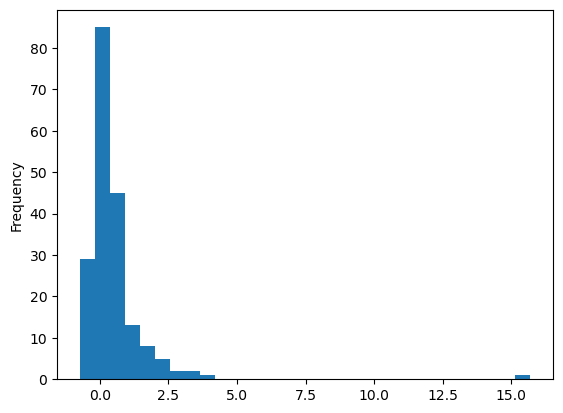

In [59]:
new_data.plot.hist(bins=30)

In [60]:
(new_data < 0).value_counts()

False    123
True      68
dtype: int64

<AxesSubplot:title={'center':'Title'}, ylabel='label'>

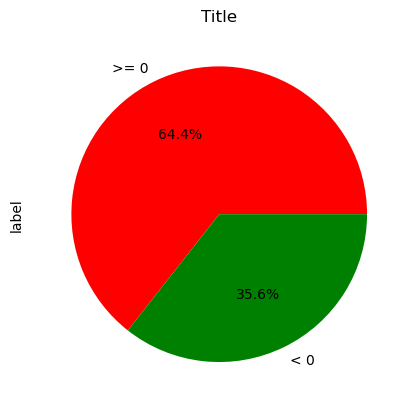

In [61]:
mx = (new_data < 0).value_counts()

mx.plot.pie(colors=['r', 'g'], labels=['>= 0', '< 0'], 
                  title='Title', ylabel='label', autopct='%1.1f%%')

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Present a chart
- The goal here is to present your message
- Visualize one chart
- Add a headline (title) to give the audience a message

<AxesSubplot:title={'center':'Countries with deceased CO2 per capit'}, ylabel='20 years CO2 per capita development'>

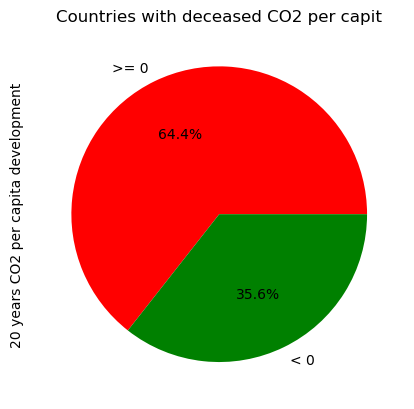

In [63]:
mx.plot.pie(colors=['r', 'g'], labels=['>= 0', '< 0'], 
                  title='Countries with deceased CO2 per capit', ylabel='20 years CO2 per capita development', autopct='%1.1f%%')

### Step 4.b (Optional): Present another chart
- Can you make a supporting chart?
- Or dig deeper into the data?
- Does this give a true picture of the situation?
- Ideas:
    - Look at the last 10 years
    - Are many countris close 0

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a: Actions
- Propose actions

### Step 5.b Measure impact
- Propose how to measure impact of actions